In [1]:
import pandas as pd 
df=pd.read_csv("c:/data/energy/ENB2012_data.csv")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [2]:
train_cols=df.columns[0:8]
print(train_cols)
X=df[train_cols]
y=df["Y1"]
print(df[train_cols].head())
print(y.head())
from sklearn.model_selection import train_test_split
X_train,X_test,y_train , y_test=train_test_split(X,y,random_state=0)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'], dtype='object')
     X1     X2     X3      X4   X5  X6   X7  X8
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0
0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64


In [3]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/ std_on_train
X_test_scaled=(X_test-mean_on_train)/std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

                 X1            X2            X3            X4            X5  \
count  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02  5.760000e+02   
mean  -1.573009e-15 -6.746147e-17  3.618028e-16  7.941179e-17  7.247289e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.346764e+00 -1.817237e+00 -1.712958e+00 -1.498746e+00 -9.751352e-01   
25%   -9.654262e-01 -7.719025e-01 -5.749374e-01 -6.825365e-01 -9.751352e-01   
50%   -2.027511e-01  1.340545e-01 -5.927190e-03  9.498830e-01 -9.751352e-01   
75%    6.552584e-01  9.703225e-01  5.630831e-01  9.498830e-01  1.023718e+00   
max    2.085274e+00  1.527835e+00  2.270114e+00  9.498830e-01  1.023718e+00   

                 X6            X7            X8  
count  5.760000e+02  5.760000e+02  5.760000e+02  
mean   3.854941e-17  2.937465e-16 -4.375358e-17  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.329847e+00 -1.775710e+00 -1.827180e+00  
25%   -4.297389e-01 -1.026125e+00 -5.2

In [4]:
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2)
model.fit(X_train_scaled,y_train)

KNeighborsRegressor(n_neighbors=2)

In [5]:
a=model.predict(X_test_scaled)
print(a.flatten()[:10])
b=y_test.values.flatten()
print(b[:10])

[15.29  10.455 36.3   16.695 32.54  28.94  28.485 28.945 28.915 30.615]
[15.18 10.32 37.26 16.95 32.26 27.9  28.18 28.95 29.07 23.8 ]


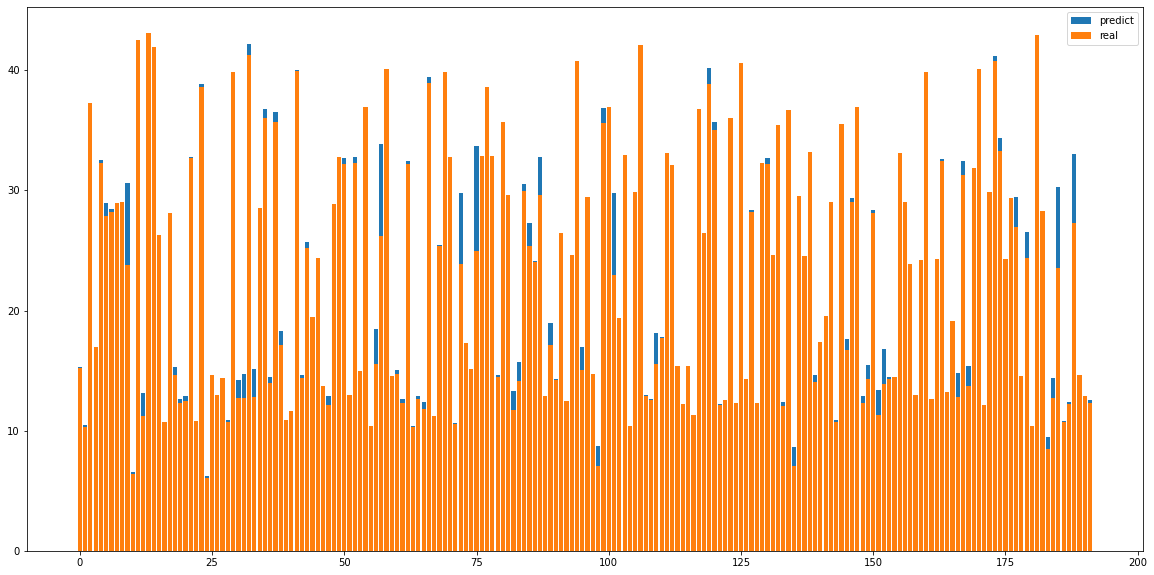

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.bar(range(len(a)), a, label='predict')
plt.bar(range(len(b)), b, label='real')
plt.legend()


In [7]:
model.score(X_test_scaled,y_test)

0.9488389791859465